In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from src.dataset import SIS_Simulator
import seaborn as sns

In [63]:
beta_true = 0.15

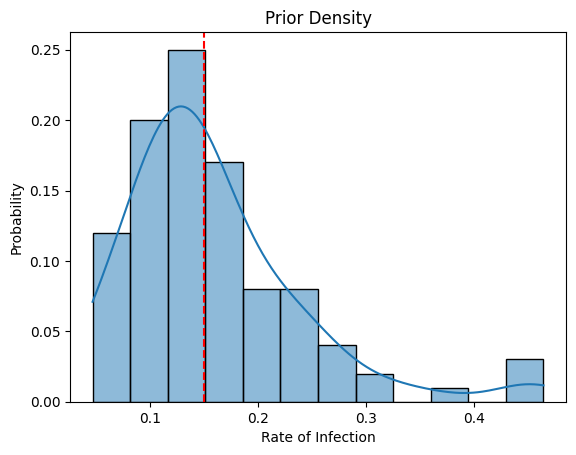

In [64]:
# visualize prior
mu = -2
sigma = 0.5
np.random.seed(10)
prior_sample = np.exp(np.random.normal(mu, sigma, (100,)))
ax = sns.histplot(prior_sample, stat="probability", kde=True)
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Prior Density")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()

In [58]:
SIS = SIS_Simulator(alpha=0.1, 
                    gamma=0.05, 
                    beta_true=beta_true,
                    prior_mu=mu,
                    prior_sigma=sigma)

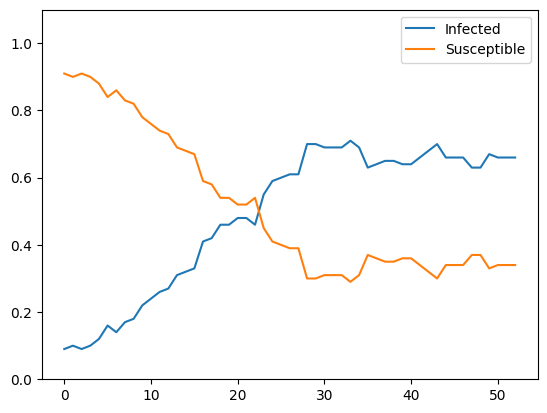

In [59]:
I_o = SIS.x_o
S_o = 1 - SIS.x_o
plt.plot(I_o, label="Infected")
plt.plot(S_o, label="Susceptible")
plt.legend(loc="upper right")
plt.ylim(0, 1.1)
plt.show()

Time lapsed: 38.34 seconds
With tolerance 0.0025, acceptance rate: 0.018288


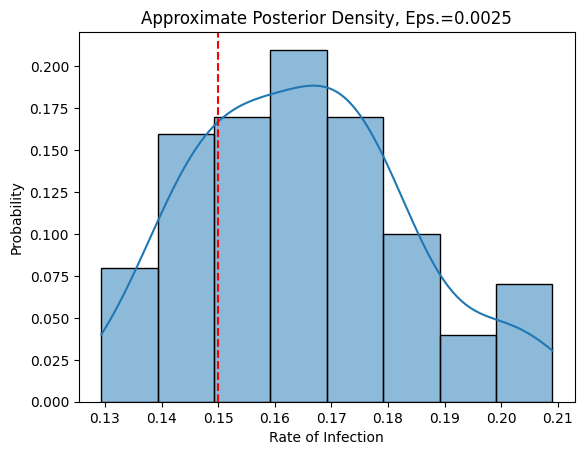

In [61]:
epsilon = 0.0025

posterior_sample, errors = SIS.abc_rejection_sampler(100, epsilon)

ax = sns.histplot(posterior_sample, stat="probability", kde=True)
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Approximate Posterior Density, Eps.={epsilon}")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()

Time lapsed: 5.70 seconds
With tolerance 0.005, acceptance rate: 0.122549


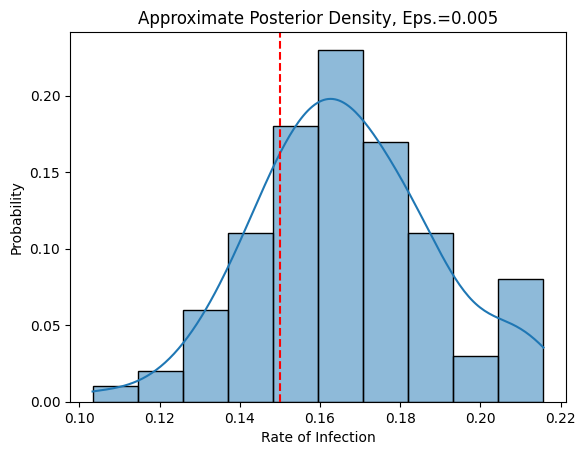

In [60]:
epsilon = 0.005

posterior_sample, errors = SIS.abc_rejection_sampler(100, epsilon)

ax = sns.histplot(posterior_sample, stat="probability", kde=True)
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Approximate Posterior Density, Eps.={epsilon}")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()

Time lapsed: 2.40 seconds
With tolerance 0.01, acceptance rate: 0.295858


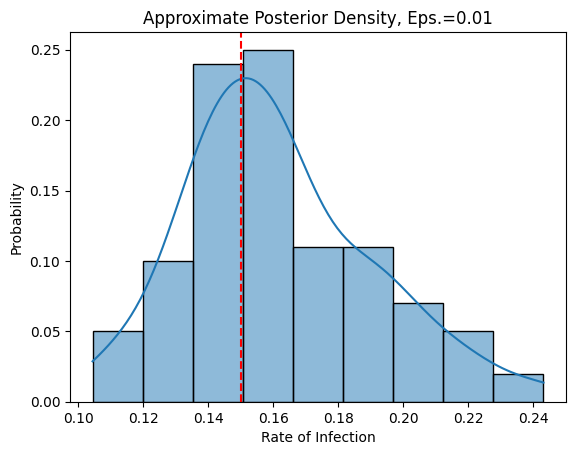

In [65]:
epsilon = 0.01

posterior_sample, errors = SIS.abc_rejection_sampler(100, epsilon)

ax = sns.histplot(posterior_sample, stat="probability", kde=True)
ax.set_xlabel("Rate of Infection")
ax.set_title(f"Approximate Posterior Density, Eps.={epsilon}")
plt.axvline(beta_true, color="red", linestyle="--")
plt.show()